# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [159]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [160]:
#Cargamos dataset a utilizar
df=pd.read_csv("car_evaluation.csv",header=None)

## Análisis exploratorio de datos

In [161]:
#Visualizacion del dataframe
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [162]:
#Analizamos el shape del objeto
df.shape

(1728, 7)

In [163]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
df.columns=["buying","maint","doors","persons","lug_boot","safety","class"]

In [164]:
#Vericamos la transformacion
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [165]:
#Visualizamos los tipos de datos
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [166]:
# Exploremos un poco mas la variable target
df["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [167]:
#Verificamos valores missings
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [168]:
#Separamos en X e y
X=df.drop(columns=["class"])
y=df["class"]

In [169]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)


In [170]:
#Veamos que obtuvimos
X_train

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med
...,...,...,...,...,...,...
1130,med,med,3,more,med,high
1294,med,low,5more,more,big,med
860,high,low,5more,more,med,high
1459,low,high,4,2,small,med


In [171]:
y_train

1178    vgood
585     unacc
1552      acc
1169    unacc
1033    unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: class, Length: 1209, dtype: object

In [172]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 1178 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1209 non-null   object
 1   maint     1209 non-null   object
 2   doors     1209 non-null   object
 3   persons   1209 non-null   object
 4   lug_boot  1209 non-null   object
 5   safety    1209 non-null   object
dtypes: object(6)
memory usage: 66.1+ KB


## Entrenamiento de modelo de clasificación con árbol de decisión

In [173]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=list(X_train.columns))

X_train=encoder.fit_transform(X_train)

X_test=encoder.transform(X_test)

In [174]:
#Verificamos la transformacion
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [175]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree=DecisionTreeClassifier(max_depth=3,random_state=0)

In [176]:
#Entrenamiento

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [177]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree=tree.predict(X_train)

y_test_pred_tree=tree.predict(X_test)

## Evaluación de modelo de clasificación con árbol de decisión

In [178]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
print(accuracy_score(y_train,y_train_pred_tree))

#Calculo el accuracy en Test
print(accuracy_score(y_test,y_test_pred_tree))

0.7766749379652605
0.7591522157996147


<Figure size 1100x1100 with 0 Axes>

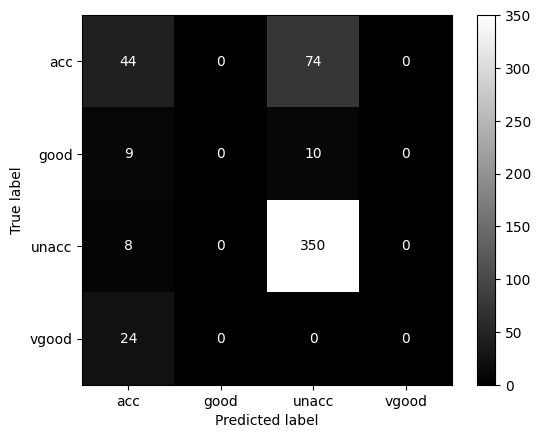

In [179]:
#Verificamos el feature importantes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_test_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=tree.classes_)
disp.plot(cmap='gray')
plt.show()

<AxesSubplot:>

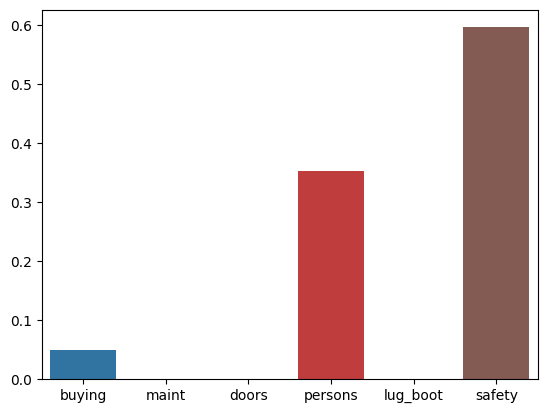

In [180]:
import seaborn as sns
importances=tree.feature_importances_
columns=X.columns

sns.barplot(x=columns,y=importances)

In [181]:
tree.classes_


array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

## Entrenamiento de modelo de clasificación con random forest

In [182]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier


In [185]:
#Calculo de las predicciones en Train y Test
rf= RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(X_train,y_train)

y_train_pred_rf=rf.predict(X_train)
y_test_pred_rf=rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [186]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train

print(accuracy_score(y_train,y_train_pred_rf))

#Calculo el accuracy en Test

print(accuracy_score(y_test,y_test_pred_rf))
#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

0.9975186104218362
0.9017341040462428


<AxesSubplot:xlabel='Features', ylabel='Importance'>

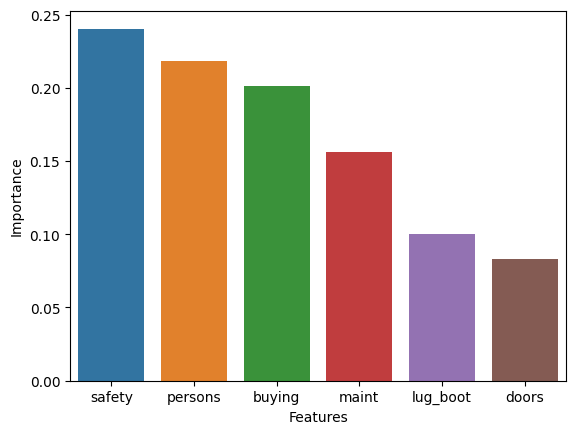

In [194]:
# Visualizacion de las feature importantes
df_res=pd.DataFrame({"Features":X.columns,"Importance":rf.feature_importances_}).sort_values("Importance",ascending=False)
df_res

sns.barplot(data=df_res,x="Features",y="Importance")


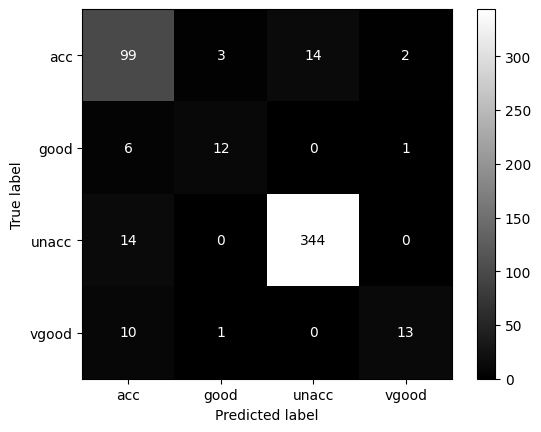

In [196]:
# Matriz de confusion del RF

cm=confusion_matrix(y_test,y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
disp.plot(cmap='gray')
plt.show()

In [197]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))


              precision    recall  f1-score   support

         acc       0.77      0.84      0.80       118
        good       0.75      0.63      0.69        19
       unacc       0.96      0.96      0.96       358
       vgood       0.81      0.54      0.65        24

    accuracy                           0.90       519
   macro avg       0.82      0.74      0.77       519
weighted avg       0.90      0.90      0.90       519

